In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import warnings 
warnings.filterwarnings("ignore")

df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [2]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2015-01-06,23.579798,23.839428,23.218089,23.641931,263188400
2015-01-07,23.910435,24.010292,23.677432,23.788385,160423600
2015-01-08,24.829132,24.886828,24.121249,24.238861,237458000


In [3]:
df = df.reset_index()
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [4]:
df.sample(5)

,Date,Close,High,Low,Open,Volume
2007,2022-12-21,133.566284,134.907371,130.903836,131.130633,85928000
2008,2022-12-22,130.391052,132.688650,128.487900,132.481579,77852100
1291,2020-02-20,77.540314,78.593392,77.034354,78.104379,100566000
64,2015-04-07,28.072802,28.542871,28.066118,28.435936,140049200
1616,2021-06-04,123.058678,123.322609,121.064557,121.279611,75169300


In [5]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [6]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2264,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,2019-07-01 19:15:03.180211712,81.473614,82.298941,80.566232,81.405127,1.237614e+08
min,2015-01-02 00:00:00,20.624048,20.927680,20.425434,20.546430,2.404830e+07
25%,2017-04-02 06:00:00,32.846511,33.042871,32.665193,32.858669,7.831732e+07
50%,2019-07-02 12:00:00,51.270496,52.082603,50.895860,51.417510,1.056556e+08
75%,2021-09-29 06:00:00,139.152397,140.840256,136.649105,139.093865,1.486811e+08
max,2023-12-29 00:00:00,196.446808,197.944126,195.346124,196.357567,6.488252e+08
std,NaN,56.045157,56.619031,55.409547,55.990450,6.818417e+07


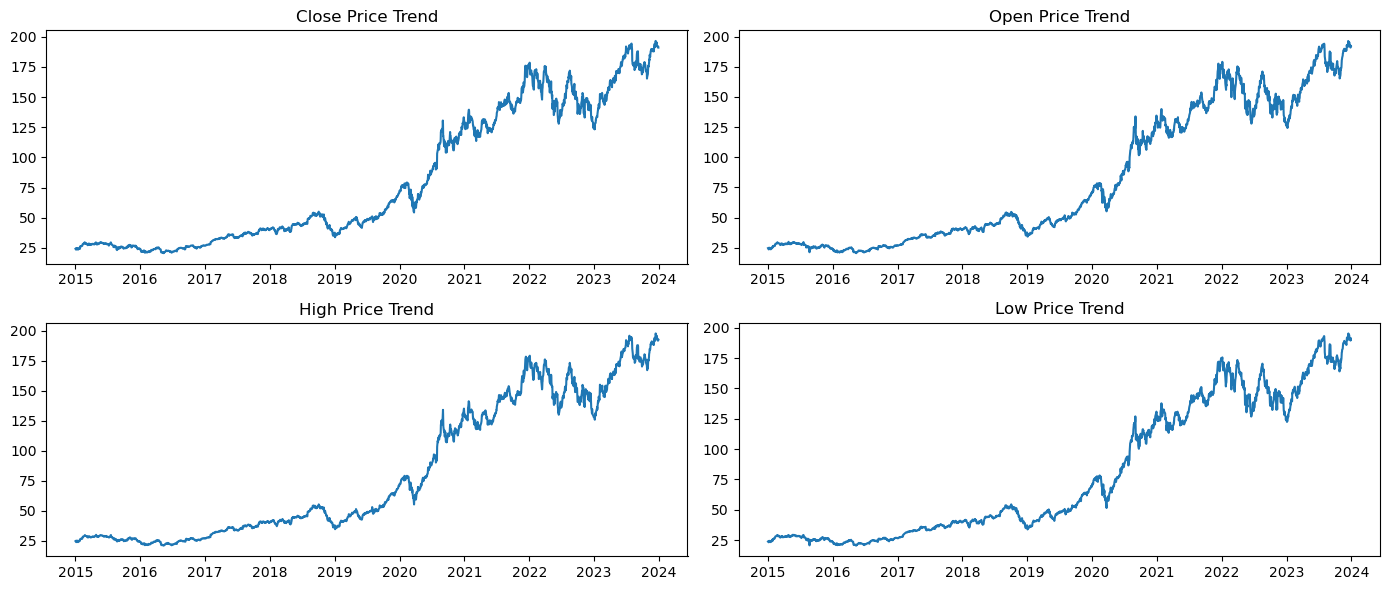

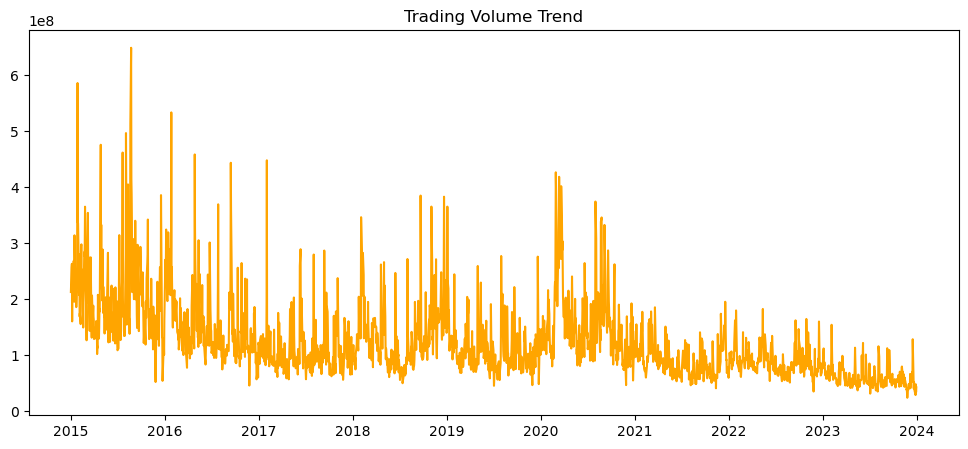

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
plt.plot(df['Date'], df['Close'])
plt.title("Close Price Trend")

plt.subplot(2,2,2)
plt.plot(df['Date'], df['Open'])
plt.title("Open Price Trend")

plt.subplot(2,2,3)
plt.plot(df['Date'], df['High'])
plt.title("High Price Trend")

plt.subplot(2,2,4)
plt.plot(df['Date'], df['Low'])
plt.title("Low Price Trend")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'], color="orange")
plt.title("Trading Volume Trend")
plt.show()

- Close, Open, High, Low all show a strong upward trend from ~2019 onwards.
- The price grew steadily, crossing $150–200 by 2023, reflecting long-term growth.
- Price movements of Open, High, Low, Close are highly correlated, moving almost in sync.

- Trading volume was very high between 2015–2017, frequently crossing 200M+ shares/day.
- After 2018, volume shows a consistent decline, indicating reduced trading activity despite rising prices.
- Peaks in volume (e.g., 2016, 2020) align with possible major events/news/market shocks.

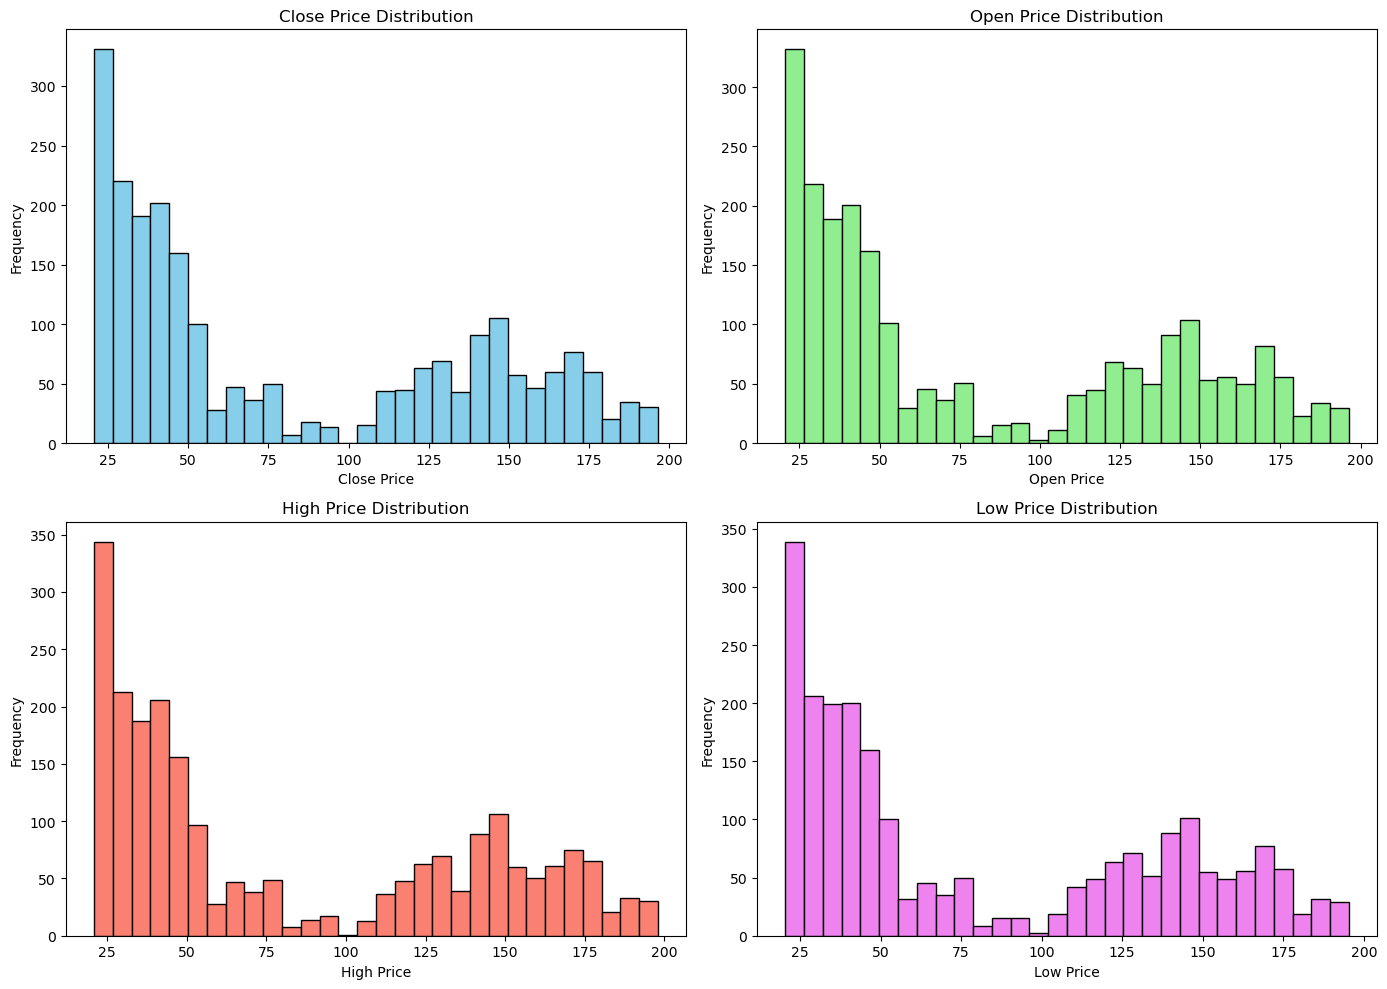

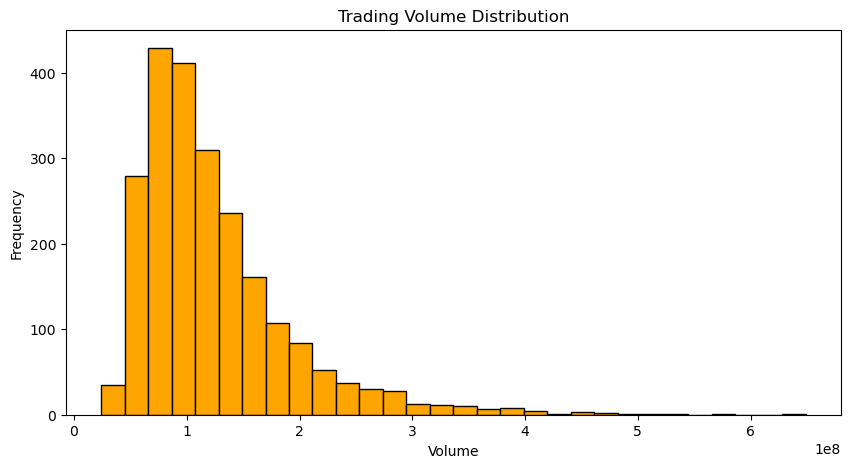

In [10]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Close'], bins=30, color="skyblue", edgecolor="black")
plt.title("Close Price Distribution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")



plt.subplot(2, 2, 2)
plt.hist(df['Open'], bins=30, color="lightgreen", edgecolor="black")
plt.title("Open Price Distribution")
plt.xlabel("Open Price")
plt.ylabel("Frequency")



plt.subplot(2, 2, 3)
plt.hist(df['High'], bins=30, color="salmon", edgecolor="black")
plt.title("High Price Distribution")
plt.xlabel("High Price")
plt.ylabel("Frequency")



plt.subplot(2, 2, 4)
plt.hist(df['Low'], bins=30, color="violet", edgecolor="black")
plt.title("Low Price Distribution")
plt.xlabel("Low Price")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30, color="orange", edgecolor="black")
plt.title("Trading Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

##  Histogram Insights

- **Close Price Distribution**
  - The distribution shows two main clusters: one at lower values (~20–50) and another at higher values (120–180).  
  - This indicates a structural shift in the stock price over time, with recent years dominating the higher-price bins.  
  - Very few occurrences below 20, confirming long-term growth and price stability in later years.  

- **Open Price Distribution**
  - Similar bimodal pattern as the Close price, highlighting the strong correlation between Open and Close.  
  - Most trading sessions opened either in the early growth stage (<50) or the recent higher phase (120–180).  
  - Almost no openings at intermediate levels, showing the market transitioned relatively quickly.  

- **High Price Distribution**
  - High prices are also clustered in the two phases: early years (<50) and recent years (>120).  
  - Peaks in frequency around 25–30 and 140–160 suggest two distinct regimes of market valuation.  
  - Higher spread compared to Open/Close since intraday highs capture volatility spikes.  

- **Low Price Distribution**
  - Low prices follow the same bimodal distribution with clusters below 50 and above 120.  
  - This confirms that downside risk shifted upward along with overall price growth.  
  - Very few extreme low values after 2019, reflecting stronger price floors in recent years.  

- **Trading Volume Distribution**
  - Strong right-skew: most trading days had volume below ~150M shares.  
  - A few extreme spikes beyond 300M–600M dominate the tail, indicating major events or shocks.  
  - Declining frequency of high-volume days in recent years shows reduced trading intensity despite price growth.  


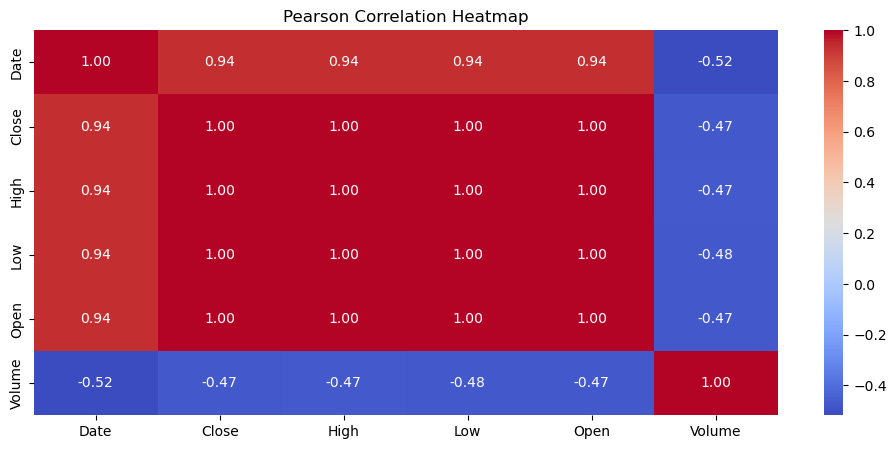

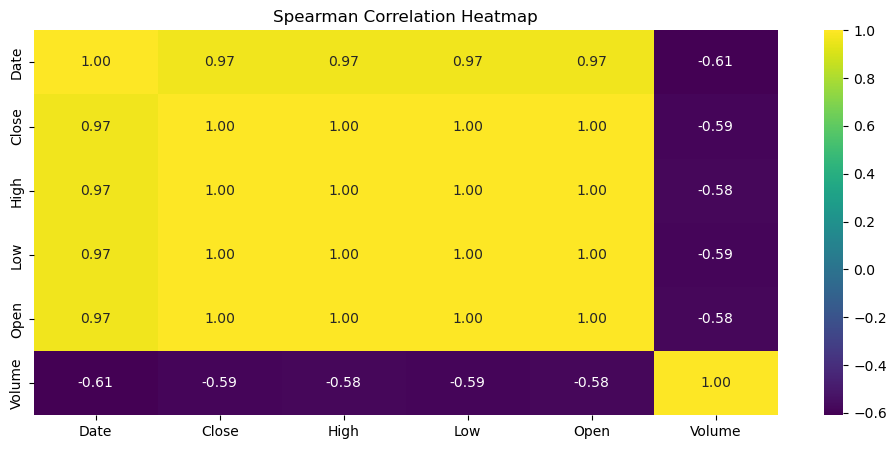

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="viridis", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [28]:
x = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1811, 4) (1811,)
Test shape: (453, 4) (453,)


In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")


Linear Regression R² Score: 0.9974
Linear Regression RMSE: 0.9368

Ridge R² Score: 0.9974
Ridge RMSE: 0.9369

Lasso R² Score: 0.9885
Lasso RMSE: 1.9815

Random Forest R² Score: 0.9007
Random Forest RMSE: 5.8331

Extra Trees R² Score: 0.9021
Extra Trees RMSE: 5.7922



In [30]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso

tscv = TimeSeriesSplit(n_splits=5)

param_grids = {
    "Linear Regression": {
        "fit_intercept": [True, False],
        "positive": [True, False]
    },
    "Ridge": {
        "alpha": [0.01, 0.1, 1, 10, 100],
        "fit_intercept": [True, False],
        "solver": ["auto", "saga", "lsqr"]
    },
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 1, 10],
        "fit_intercept": [True, False],
        "max_iter": [1000, 5000, 10000]
    }
}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

best_models = {}

for name, model in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=tscv,
        scoring="r2",
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Linear Regression Best Params: {'fit_intercept': False, 'positive': False}
Linear Regression R² Score: 0.9975
Linear Regression RMSE: 0.9320

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Ridge Best Params: {'alpha': 1, 'fit_intercept': False, 'solver': 'auto'}
Ridge R² Score: 0.9975
Ridge RMSE: 0.9322

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Lasso Best Params: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 10000}
Lasso R² Score: 0.9964
Lasso RMSE: 1.1029



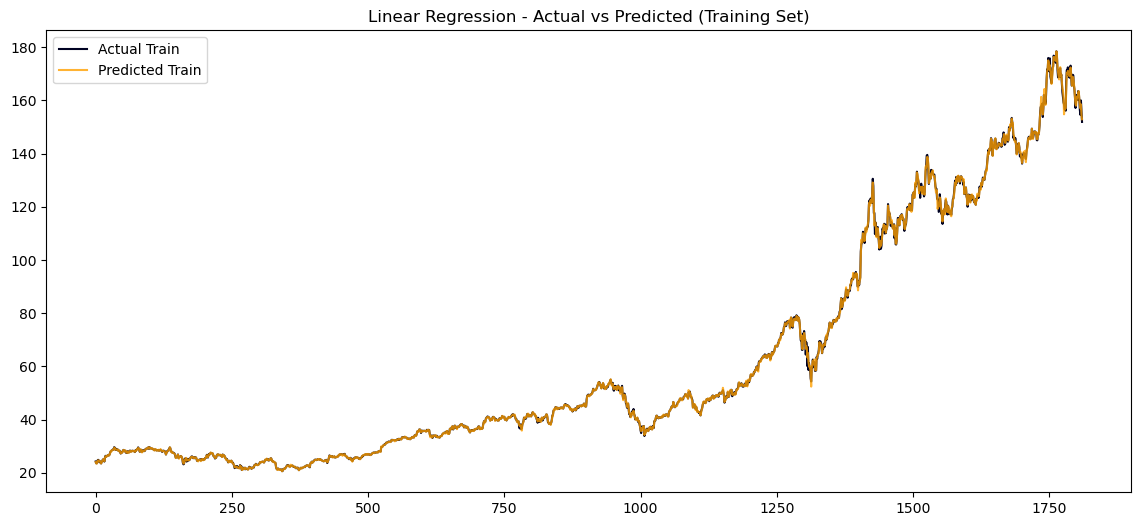

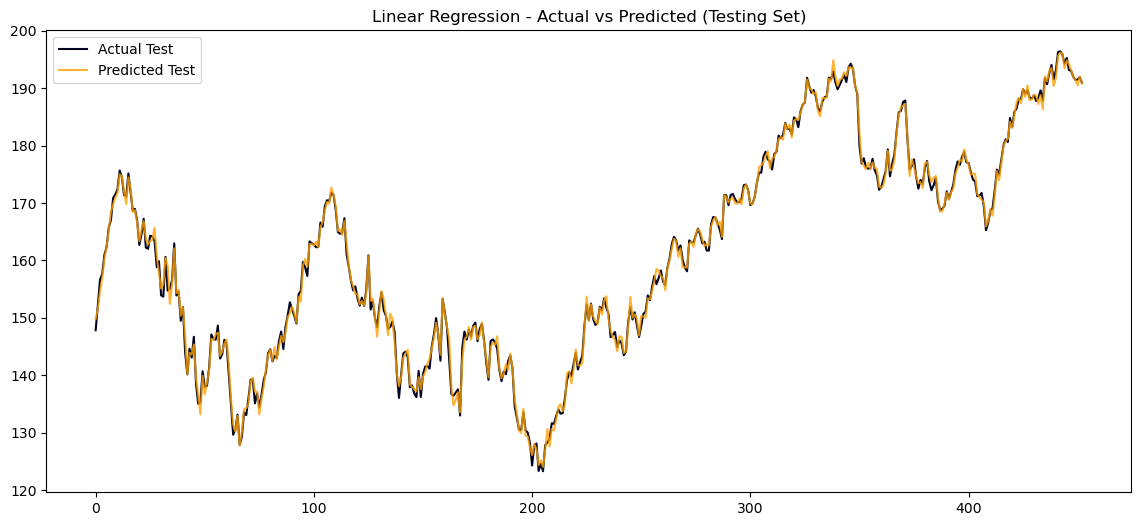

In [31]:
lr = LinearRegression(fit_intercept=False, positive=False)
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_train.values, label="Actual Train", color="#000223")
plt.plot(y_train_pred, label="Predicted Train", color="#FFA000", alpha=0.8)
plt.title("Linear Regression - Actual vs Predicted (Training Set)")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Test", color="#000223")
plt.plot(y_test_pred, label="Predicted Test", color="#FFA000", alpha=0.8)
plt.title("Linear Regression - Actual vs Predicted (Testing Set)")
plt.legend()
plt.show()